# Word Cloud: `processed_reviews_new_API_data.csv`

In [21]:
!pip install nltk

In [22]:
!pip install tqdm

In [23]:
!pip install wordcloud

In [24]:
!pip install IPython

In [25]:
from IPython.display import Javascript
Javascript("Jupyter.notebook.kernel.restart({ 'timeout': 18000 })")

<IPython.core.display.Javascript object>

In [35]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import pos_tag

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sebastianvanhemert/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sebastianvanhemert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sebastianvanhemert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sebastianvanhemert/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sebastianvanhemert/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [27]:
#df = pd.read_csv('test_set.csv')
df = pd.read_csv('processed_reviews_new_API_data.csv')

In [28]:
df.head()

,reviewId,asin,date_cleaned,username,title,keyword,verified,rating_cleaned,text,train_test,data_source
0,RU2LN4GFJTIOA,B0CN8KSFF2,2024-07-10,Jenny Sheline,Great personalized pens at a great price!,NaN,True,5.0,"Much nicer than expected, very smooth when wri...",test,new data
1,R7JKFNZ7GKUZ9,B0CN8KSFF2,2024-06-25,Amazon Customer,"Beautiful Pens, more than expected",NaN,True,5.0,The pen is beautiful. The customize lettering...,test,new data
2,R1BMFBC78IWMEV,B0CN8KSFF2,2024-05-24,Maria,Great for the price,NaN,True,5.0,I am still getting my business off the ground ...,test,new data
3,RA2Z63BT6RUSZ,B0CN8KSFF2,2024-06-12,Princess,Overjoyed,NaN,True,4.0,as a part of my daughter-in-law‘s birthday gif...,test,new data
4,R21W2492GLLIT8,B0CN8KSFF2,2024-05-08,chrissy,Garbage,NaN,True,5.0,They are cute but the actual pen breaks so easily,test,new data


In [29]:
# Convert 'text' column to lowercase
df['text'] = df['text'].str.lower()

# Print the processed DataFrame to verify results
print(df.text)

0       much nicer than expected, very smooth when wri...
1       the pen is beautiful.  the customize lettering...
2       i am still getting my business off the ground ...
3       as a part of my daughter-in-law‘s birthday gif...
4       they are cute but the actual pen breaks so easily
                              ...                        
3083    used for st. patty day party. worked like they...
3084    worked great for age verified bands for our on...
3085    i use over 21 bracelets every year for an even...
3086    they are good for the entrance but not for alc...
3087    band tears when removing the tab for the adhes...
Name: text, Length: 3088, dtype: object


In [30]:
# Define a function to tokenize and remove punctuation with progress tracking
def tokenize_with_progress(text):
    tokens = word_tokenize(str(text))  # Tokenize the text into words
    tokens_cleaned = [token.lower() for token in tokens if token.isalnum()]  # Remove non-alphanumeric tokens
    return tokens_cleaned

# Apply tokenization with tqdm progress bar
tqdm.pandas(desc="Tokenizing and cleaning")
df['text'] = df['text'].progress_apply(tokenize_with_progress)

# Print the processed DataFrame to verify results
print(df['text'])

Tokenizing and cleaning: 100%|██████████| 3088/3088 [00:02<00:00, 1220.43it/s]

0       [much, nicer, than, expected, very, smooth, wh...
1       [the, pen, is, beautiful, the, customize, lett...
2       [i, am, still, getting, my, business, off, the...
3       [as, a, part, of, my, s, birthday, gift, theme...
4       [they, are, cute, but, the, actual, pen, break...
                              ...                        
3083    [used, for, patty, day, party, worked, like, t...
3084    [worked, great, for, age, verified, bands, for...
3085    [i, use, over, 21, bracelets, every, year, for...
3086    [they, are, good, for, the, entrance, but, not...
3087    [band, tears, when, removing, the, tab, for, t...
Name: text, Length: 3088, dtype: object


In [31]:
# Define stopwords removal function
def remove_stopwords(words_list):
    stop_words = set(stopwords.words('english'))
    return [word for word in words_list if word not in stop_words]

# Apply stopwords removal with tqdm progress bar
tqdm.pandas(desc="Removing stopwords")
df['text'] = df['text'].progress_apply(remove_stopwords)

# Print the processed DataFrame to verify results
print(df['text'])

Removing stopwords: 100%|██████████| 3088/3088 [00:00<00:00, 4559.70it/s]

0                [much, nicer, expected, smooth, writing]
1       [pen, beautiful, customize, lettering, beautif...
2       [still, getting, business, ground, companies, ...
3       [part, birthday, gift, theme, respect, crown, ...
4                     [cute, actual, pen, breaks, easily]
                              ...                        
3083    [used, patty, day, party, worked, like, suppos...
3084    [worked, great, age, verified, bands, one, day...
3085    [use, 21, bracelets, every, year, event, help,...
3086    [good, entrance, alcohol, pretty, easy, take, ...
3087    [band, tears, removing, tab, adhesive, strip, ...
Name: text, Length: 3088, dtype: object


In [36]:
# Initialize WordNet Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define lemmatization function with filtering based on POS tags
def lemmatize_words(words_list):
    # Get POS tags for words in the list
    pos_tags = pos_tag(words_list)
    # Lemmatize words only if they are nouns (NN, NNS, NNP, NNPS) or adjectives (JJ, JJR, JJS)
    return [lemmatizer.lemmatize(word.lower(), pos=get_wordnet_pos(tag))
            for word, tag in pos_tags
            if tag.startswith('NN') or tag.startswith('JJ')]

# Helper function to map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'  # Adjective
    elif tag.startswith('N'):
        return 'n'  # Noun
    else:
        return None  # Exclude other parts of speech

# Apply tokenization and lemmatization with tqdm progress bar
tqdm.pandas(desc="Lemmatizing")
df['text'] = df['text'].progress_apply(lemmatize_words)  # Lemmatize based on POS tags

# Print the processed DataFrame to verify results
print(df['text'])

Lemmatizing: 100%|██████████| 3088/3088 [00:10<00:00, 284.23it/s]

0                                           [much, nicer]
1       [pen, beautiful, customize, beautiful, color, ...
2       [business, ground, company, expensive, tried, ...
3       [part, birthday, gift, theme, pen, fabulous, p...
4                              [cute, actual, pen, break]
                              ...                        
3083              [patty, day, party, happy, wrist, band]
3084                 [great, age, band, day, long, event]
3085    [use, bracelet, year, event, help, year, over,...
3086    [good, entrance, alcohol, pretty, easy, take, ...
3087     [band, tear, tab, adhesive, strip, solid, strip]
Name: text, Length: 3088, dtype: object


'\nlemmatizer = WordNetLemmatizer()\nstop_words = set(stopwords.words(\'english\'))\n\n# Define lemmatization function\n#def lemmatize_words(words_list):\n#    return [lemmatizer.lemmatize(word.lower(), pos=\'v\') for word in words_list if word.lower() not in stop_words]\n\n# Define lemmatization function with filtering based on POS tags\ndef lemmatize_words(words_list):\n    # Get POS tags for words in the list\n    pos_tags = pos_tag(words_list)\n    # Lemmatize words only if they are nouns (NN, NNS, NNP, NNPS) or adjectives (JJ, JJR, JJS)\n    return [lemmatizer.lemmatize(word.lower(), pos=get_wordnet_pos(tag))\n            for word, tag in pos_tags\n            if tag.startswith(\'NN\') or tag.startswith(\'JJ\')]\n\n# Helper function to map POS tags to WordNet POS tags\ndef get_wordnet_pos(tag):\n    if tag.startswith(\'J\'):\n        return \'a\'  # Adjective\n    elif tag.startswith(\'N\'):\n        return \'n\'  # Noun\n    else:\n        return None  # Exclude other parts of sp

In [ ]:
# Initialize PorterStemmer outside the function for efficiency
#stemmer = PorterStemmer()

# Define stemming function
#def stem_words(words_list):
#    return [stemmer.stem(word) for word in words_list]

# Apply stemming with tqdm progress bar
#tqdm.pandas(desc="Stemming")
#df['text'] = df['text'].progress_apply(stem_words)

# Print the processed DataFrame to verify results
#print(df['text'])

In [37]:
# Define function to combine words into single string
def combine_words(words_list):
    return ' '.join(words_list)

# Apply combining with tqdm progress bar
tqdm.pandas(desc="Combining words")
df['text'] = df['text'].progress_apply(combine_words)

# Combine all reviews into a single string
all_text = ' '.join(df['text'].tolist())

print(len(all_text))
#print()
#print(all_text)

Combining words: 100%|██████████| 3088/3088 [00:00<00:00, 167970.16it/s]

555796


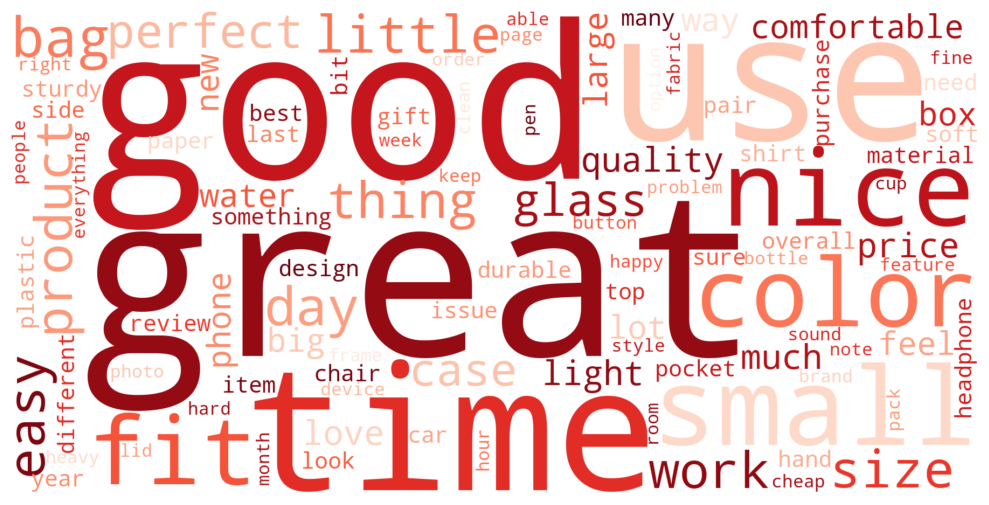

In [38]:
# Create a WordCloud object with white background and red word colors
wordcloud_new_api = WordCloud(width=600, height=300, background_color='white', colormap='Reds', scale=3, max_words=100).generate(all_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_new_api, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# Show plot
plt.show()

In [39]:
# Save the WordCloud as an image file (e.g., PNG or JPEG)
wordcloud.to_file('wordcloud_processed_reviews_new_API_data.png')

# Word Cloud: `synthetic_data_sustainability_positive.csv`

In [78]:
synthetic_pos = pd.read_csv('synthetic_data_sustainability_positive.csv')

# Rename the column 'amazon_review' to 'text'
synthetic_pos = synthetic_pos.rename(columns={'amazon_review': 'text'})

synthetic_pos.head()

,text,attribute,attribute_sentiment
0,This product is a game-changer for those looki...,1,1
1,I love how this product is crafted from renewa...,1,1
2,I am thrilled with this product's eco-friendly...,1,1
3,I am impressed by this product's commitment to...,1,1
4,This product is a game-changer for those looki...,1,1


In [79]:
# Convert 'text' column to lowercase
synthetic_pos['text'] = synthetic_pos['text'].str.lower()

# Print the processed DataFrame to verify results
print(synthetic_pos.text)

0       this product is a game-changer for those looki...
1       i love how this product is crafted from renewa...
2       i am thrilled with this product's eco-friendly...
3       i am impressed by this product's commitment to...
4       this product is a game-changer for those looki...
                              ...                        
1495    i recently purchased a beautifully designed ec...
1496    i recently purchased a beautifully designed ec...
1497    i recently purchased an amazing eco-friendly c...
1498    i recently purchased a beautifully designed an...
1499    i recently purchased an amazing eco-friendly c...
Name: text, Length: 1500, dtype: object


In [80]:
# Apply tokenization with tqdm progress bar
tqdm.pandas(desc="Tokenizing and cleaning")
synthetic_pos['text'] = synthetic_pos['text'].progress_apply(tokenize_with_progress)

# Print the processed DataFrame to verify results
print(synthetic_pos['text'])

Tokenizing and cleaning: 100%|██████████| 1500/1500 [00:01<00:00, 1228.71it/s]

0       [this, product, is, a, for, those, looking, to...
1       [i, love, how, this, product, is, crafted, fro...
2       [i, am, thrilled, with, this, product, design,...
3       [i, am, impressed, by, this, product, commitme...
4       [this, product, is, a, for, those, looking, to...
                              ...                        
1495    [i, recently, purchased, a, beautifully, desig...
1496    [i, recently, purchased, a, beautifully, desig...
1497    [i, recently, purchased, an, amazing, consumer...
1498    [i, recently, purchased, a, beautifully, desig...
1499    [i, recently, purchased, an, amazing, consumer...
Name: text, Length: 1500, dtype: object


In [81]:
# Apply stopwords removal with tqdm progress bar
tqdm.pandas(desc="Removing stopwords")
synthetic_pos['text'] = synthetic_pos['text'].progress_apply(remove_stopwords)

# Print the processed DataFrame to verify results
print(synthetic_pos['text'])

Removing stopwords: 100%|██████████| 1500/1500 [00:00<00:00, 3100.22it/s]

0       [product, looking, embrace, lifestyle, renewab...
1       [love, product, crafted, renewable, resources,...
2       [thrilled, product, design, production, proces...
3       [impressed, product, commitment, use, renewabl...
4       [product, looking, embrace, lifestyle, renewab...
                              ...                        
1495    [recently, purchased, beautifully, designed, c...
1496    [recently, purchased, beautifully, designed, c...
1497    [recently, purchased, amazing, consumer, produ...
1498    [recently, purchased, beautifully, designed, c...
1499    [recently, purchased, amazing, consumer, produ...
Name: text, Length: 1500, dtype: object


In [82]:
# Apply tokenization and lemmatization with tqdm progress bar
tqdm.pandas(desc="Lemmatizing")
synthetic_pos['text'] = synthetic_pos['text'].progress_apply(lemmatize_words)  # Lemmatize based on POS tags

# Print the processed DataFrame to verify results
print(synthetic_pos['text'])

Lemmatizing: 100%|██████████| 1500/1500 [00:03<00:00, 385.59it/s]

0       [product, embrace, lifestyle, renewable, resou...
1          [product, renewable, resource, anyone, aiming]
2       [thrilled, product, design, production, proces...
3       [impressed, product, commitment, use, renewabl...
4       [product, embrace, lifestyle, renewable, resou...
                              ...                        
1495    [consumer, product, renewable, material, featu...
1496    [consumer, product, renewable, material, featu...
1497    [amazing, consumer, product, renewable, materi...
1498    [consumer, product, renewable, material, featu...
1499    [amazing, consumer, product, renewable, materi...
Name: text, Length: 1500, dtype: object


In [83]:
# Apply combining with tqdm progress bar
tqdm.pandas(desc="Combining words")
synthetic_pos['text'] = synthetic_pos['text'].progress_apply(combine_words)

# Combine all reviews into a single string
synthetic_pos_all_text = ' '.join(synthetic_pos['text'].tolist())

print(len(synthetic_pos_all_text))

Combining words: 100%|██████████| 1500/1500 [00:00<00:00, 28151.58it/s]

217580


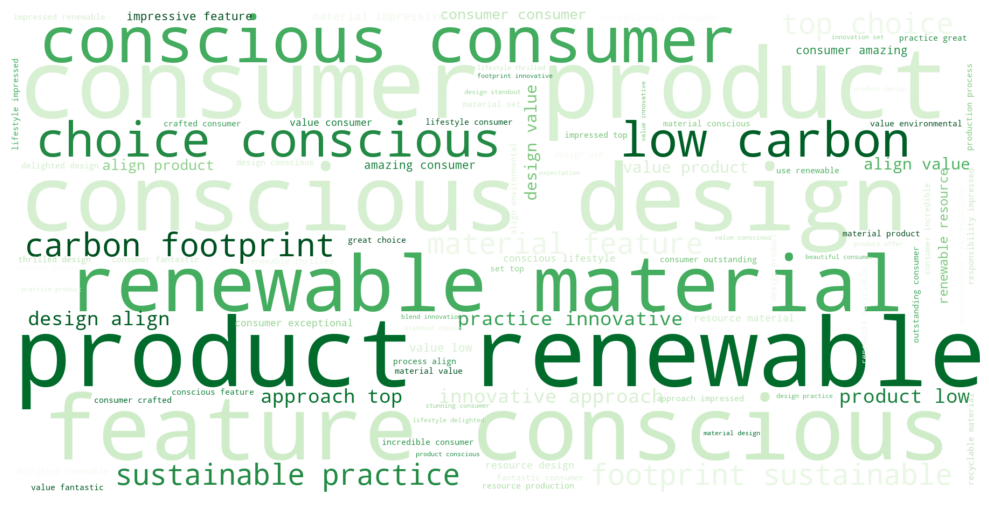

In [84]:
# Create a WordCloud object with white background and red word colors
wordcloud_synthetic = WordCloud(width=600, height=300, background_color='white', colormap='Greens', scale=3, max_words=100).generate(synthetic_pos_all_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_synthetic, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# Show plot
plt.show()

In [85]:
# Save the WordCloud as an image file (e.g., PNG or JPEG)
wordcloud.to_file('wordcloud_synthetic_pos.png')

# Word Cloud: `synthetic_data_sustainability_negative.csv`

In [59]:
synthetic_neg = pd.read_csv('synthetic_data_sustainability_negative.csv')

# Rename the column 'amazon_review' to 'text'
synthetic_neg = synthetic_neg.rename(columns={'amazon_review': 'text'})

synthetic_neg.head()

,text,attribute,attribute_sentiment
0,This product is extremely wasteful and environ...,1,-1
1,This product's high-impact production methods ...,1,-1
2,This product's manufacturing process is highly...,1,-1
3,This product's manufacturing process is highly...,1,-1
4,This product's manufacturing process is highly...,1,-1


In [60]:
# Convert 'text' column to lowercase
synthetic_neg['text'] = synthetic_neg['text'].str.lower()

# Print the processed DataFrame to verify results
print(synthetic_neg.text)

0       this product is extremely wasteful and environ...
1       this product's high-impact production methods ...
2       this product's manufacturing process is highly...
3       this product's manufacturing process is highly...
4       this product's manufacturing process is highly...
                              ...                        
1495    this purportedly eco-friendly consumer product...
1496    this eco-friendly consumer product, marketed a...
1497    this allegedly eco-friendly consumer product, ...
1498    this eco-friendly consumer product, marketed a...
1499    this supposedly eco-friendly consumer product,...
Name: text, Length: 1500, dtype: object


In [61]:
# Apply tokenization with tqdm progress bar
tqdm.pandas(desc="Tokenizing and cleaning")
synthetic_neg['text'] = synthetic_neg['text'].progress_apply(tokenize_with_progress)

# Print the processed DataFrame to verify results
print(synthetic_neg['text'])

Tokenizing and cleaning: 100%|██████████| 1500/1500 [00:00<00:00, 1582.90it/s]

0       [this, product, is, extremely, wasteful, and, ...
1       [this, product, production, methods, are, extr...
2       [this, product, manufacturing, process, is, hi...
3       [this, product, manufacturing, process, is, hi...
4       [this, product, manufacturing, process, is, hi...
                              ...                        
1495    [this, purportedly, consumer, product, markete...
1496    [this, consumer, product, marketed, as, a, bea...
1497    [this, allegedly, consumer, product, marketed,...
1498    [this, consumer, product, marketed, as, a, bea...
1499    [this, supposedly, consumer, product, marketed...
Name: text, Length: 1500, dtype: object


In [62]:
# Apply stopwords removal with tqdm progress bar
tqdm.pandas(desc="Removing stopwords")
synthetic_neg['text'] = synthetic_neg['text'].progress_apply(remove_stopwords)

# Print the processed DataFrame to verify results
print(synthetic_neg['text'])

Removing stopwords: 100%|██████████| 1500/1500 [00:00<00:00, 3155.82it/s]

0       [product, extremely, wasteful, environmentally...
1       [product, production, methods, extremely, poll...
2       [product, manufacturing, process, highly, dama...
3       [product, manufacturing, process, highly, dama...
4       [product, manufacturing, process, highly, dama...
                              ...                        
1495    [purportedly, consumer, product, marketed, sus...
1496    [consumer, product, marketed, beacon, sustaina...
1497    [allegedly, consumer, product, marketed, susta...
1498    [consumer, product, marketed, beacon, sustaina...
1499    [supposedly, consumer, product, marketed, sust...
Name: text, Length: 1500, dtype: object


In [64]:
# Apply tokenization and lemmatization with tqdm progress bar
tqdm.pandas(desc="Lemmatizing")
synthetic_neg['text'] = synthetic_neg['text'].progress_apply(lemmatize_words)  # Lemmatize based on POS tags

# Print the processed DataFrame to verify results
print(synthetic_neg['text'])

Lemmatizing: 100%|██████████| 1500/1500 [00:03<00:00, 432.93it/s]


0       [product, wasteful, damaging, production, method]
1       [product, production, method, harmful, environ...
2       [product, process, environment, extractive, me...
3       [product, process, environment, extractive, me...
4       [product, process, environment, extractive, me...
                              ...                        
1495    [consumer, product, sustainable, choice, envir...
1496    [consumer, product, beacon, sustainability, up...
1497    [consumer, product, sustainable, choice, envir...
1498    [consumer, product, beacon, sustainability, li...
1499    [consumer, product, sustainable, choice, fails...
Name: text, Length: 1500, dtype: object


In [65]:
# Apply combining with tqdm progress bar
tqdm.pandas(desc="Combining words")
synthetic_neg['text'] = synthetic_neg['text'].progress_apply(combine_words)

# Combine all reviews into a single string
synthetic_neg_all_text = ' '.join(synthetic_neg['text'].tolist())

print(len(synthetic_neg_all_text))

Combining words: 100%|██████████| 1500/1500 [00:00<00:00, 202682.13it/s]

287577


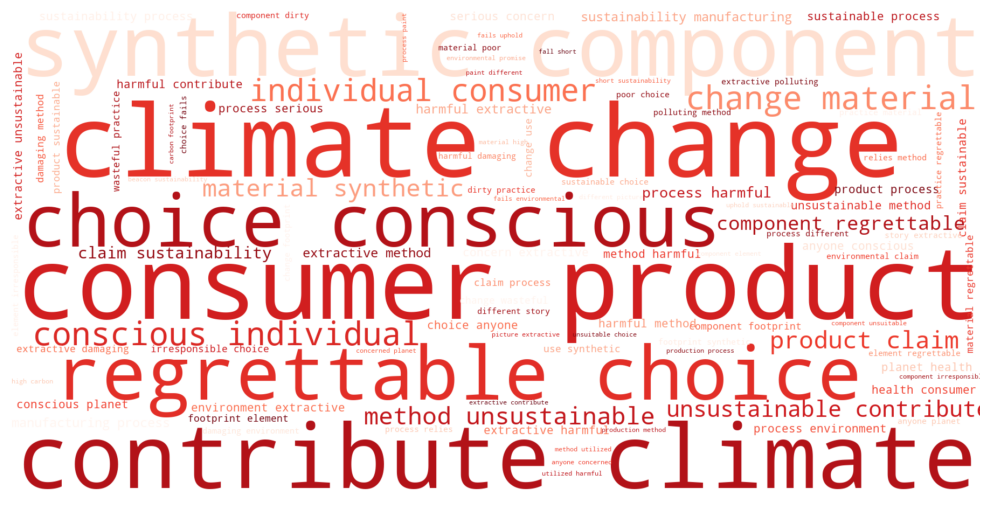

In [66]:
# Create a WordCloud object with white background and red word colors
wordcloud_synthetic_neg = WordCloud(width=600, height=300, background_color='white', colormap='Reds', scale=3, max_words=100).generate(synthetic_neg_all_text)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_synthetic_neg, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

# Show plot
plt.show()

In [67]:
# Save the WordCloud as an image file (e.g., PNG or JPEG)
wordcloud.to_file('wordcloud_synthetic_neg.png')